In [1]:
from utils.plot import plot
from utils.analyze import load_data
from utils.analysis import sensor_function, wiener, detrend2D
import numpy as np
from skimage.filters import gaussian
from scipy.ndimage import imread
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = "cs02"
numbers = range(6)
directory_back = "cs02_background"
numbers_back = range(4)

In [3]:
x_sample, y_sample, z_sample, T_sample, t_sample, settings_sample = load_data(directory, numbers)
x_back, y_back, z_back, T_back, t_back, settings_back = load_data(directory_back, numbers_back)

Parameters([('a', <Parameter 'a', value=0.0065284590812328437 +/- 0, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=-0.22804699142645921 +/- 0, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=7.5737143588982496 +/- 0, bounds=[-inf:inf]>), ('d', <Parameter 'd', value=0.0 +/- 0, bounds=[-inf:inf]>), ('e', <Parameter 'e', value=1000.0000149011612 +/- 0, bounds=[-inf:inf]>)])


(<matplotlib.figure.Figure at 0x7f0cc4402c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c93380e48>)

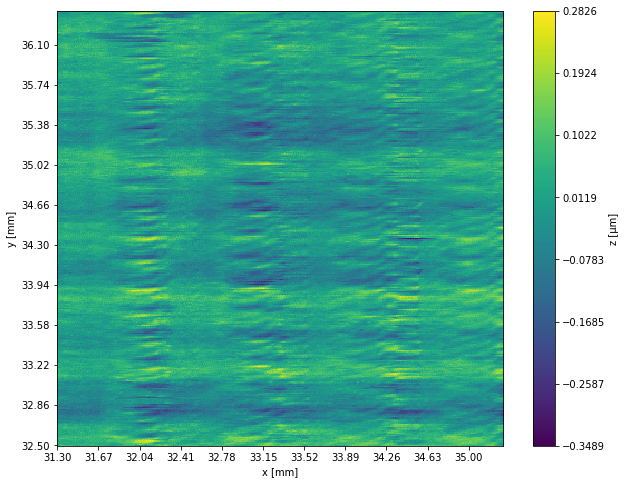

In [6]:
settings = settings_sample[0]
x = x_sample[0]
y = y_sample[0]
sample = z_sample[0][0]
background = z_back[0][0]

signal = sample - background
noise = z_sample[2][0] - z_sample[1][0]
noise = detrend2D(x, y, noise)

plot(x, y, noise)

In [9]:
ideal = imread("data/cs02/ideal.png", flatten=True)
ideal *= (15 / ideal.max())

In [41]:
signal.dtype

dtype('float64')

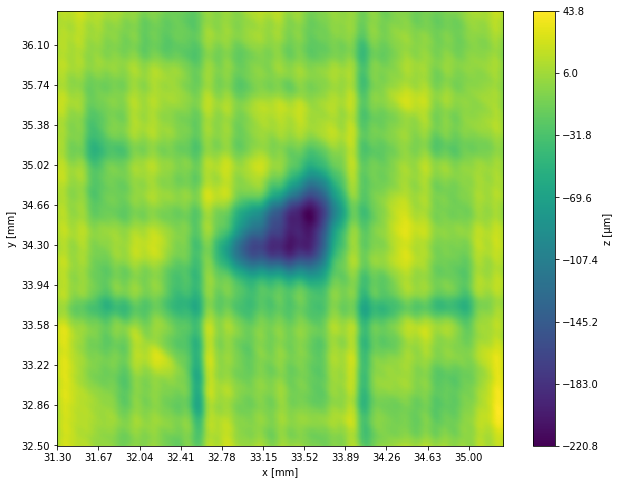

257 4.8 0.5


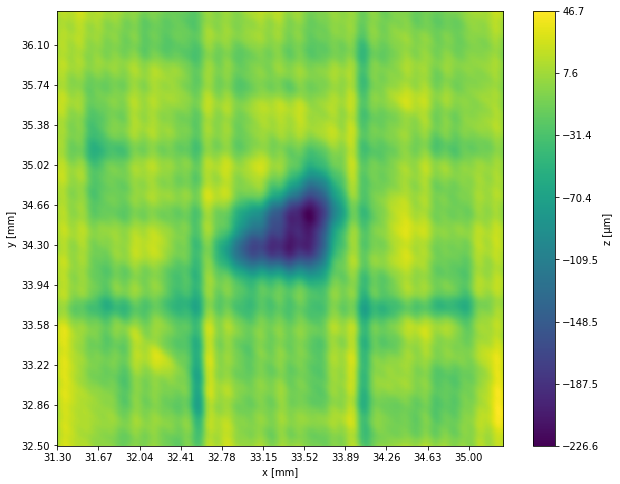

257 4.8 0.578947368421


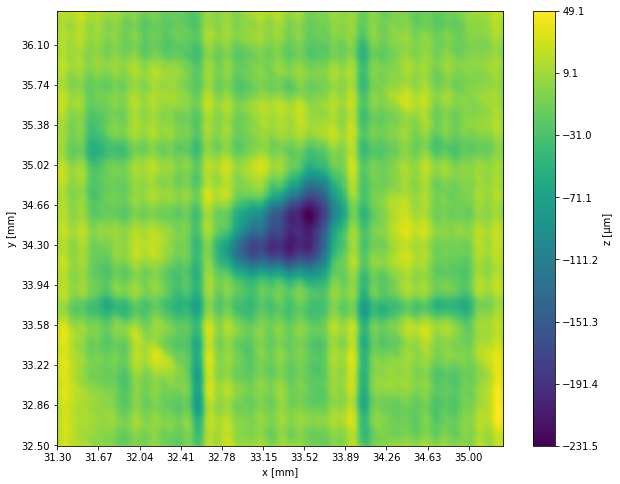

257 4.8 0.657894736842


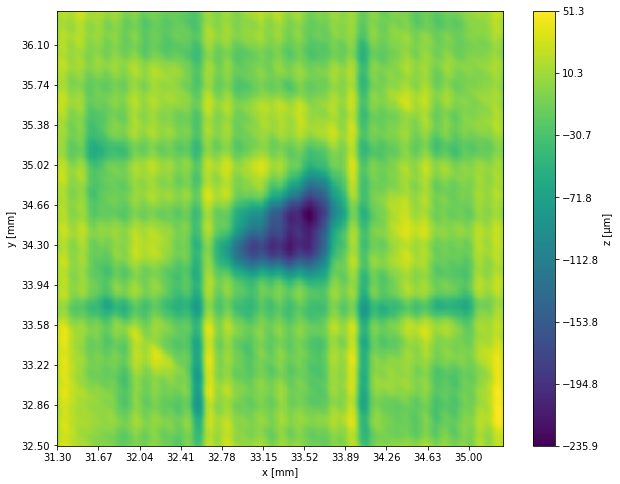

257 4.8 0.736842105263


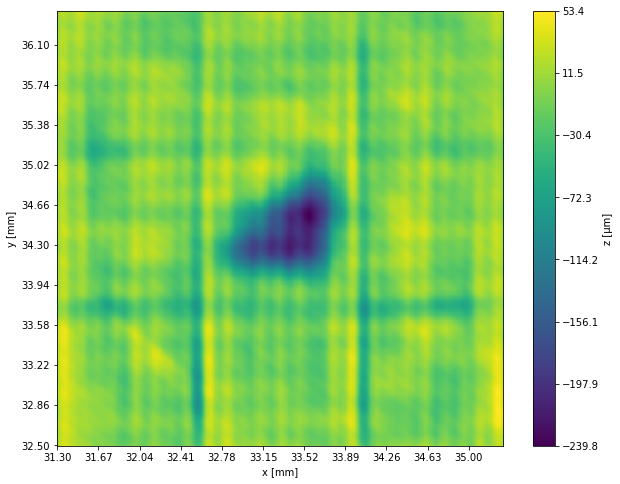

257 4.8 0.815789473684


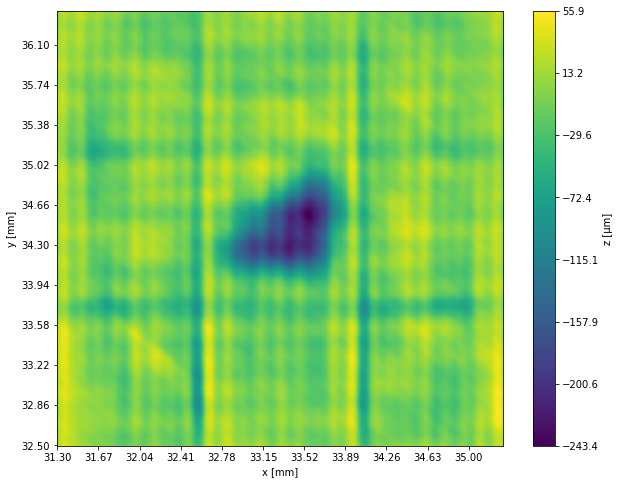

257 4.8 0.894736842105


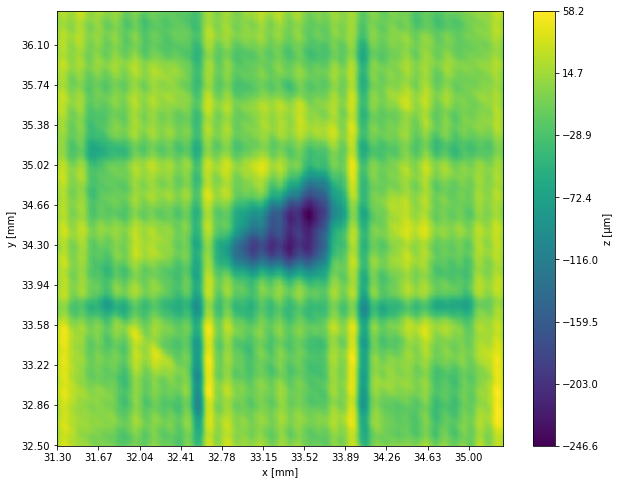

257 4.8 0.973684210526


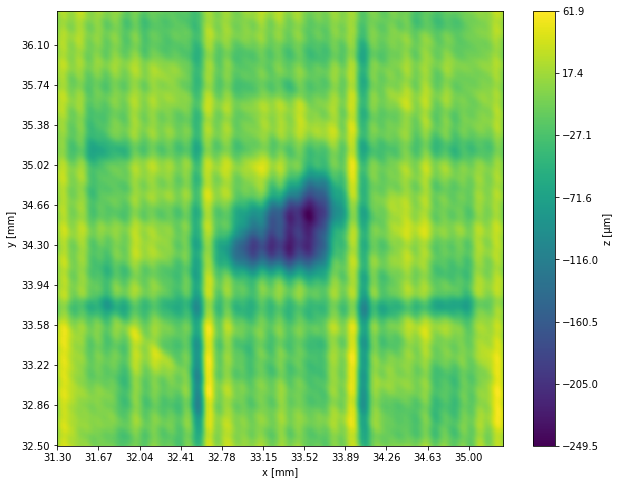

257 4.8 1.05263157895


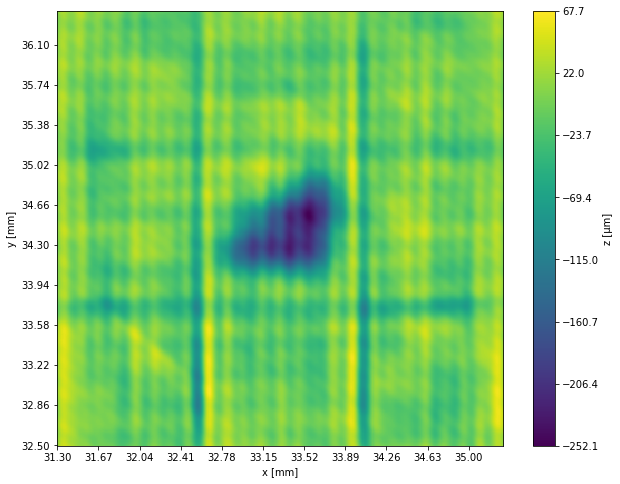

257 4.8 1.13157894737


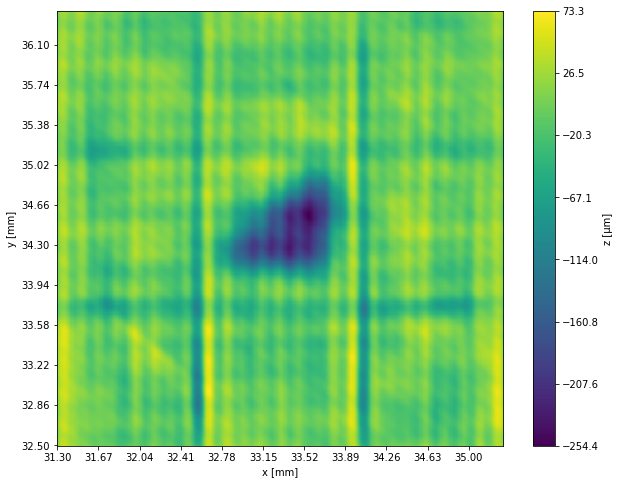

257 4.8 1.21052631579


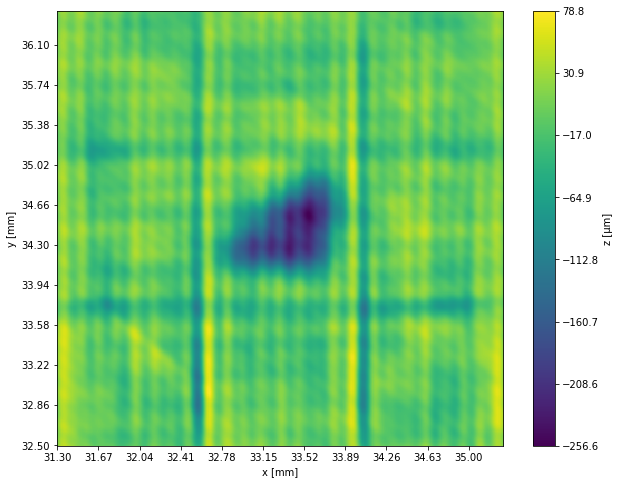

257 4.8 1.28947368421


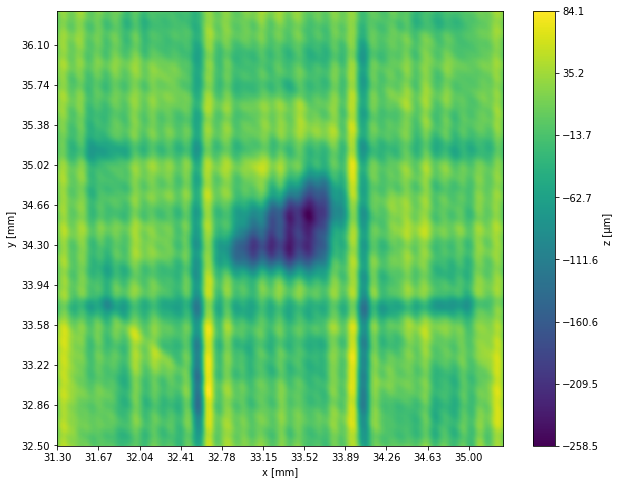

257 4.8 1.36842105263


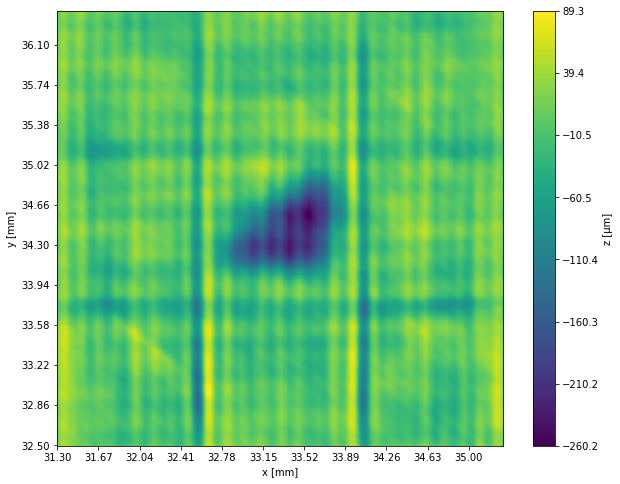

257 4.8 1.44736842105


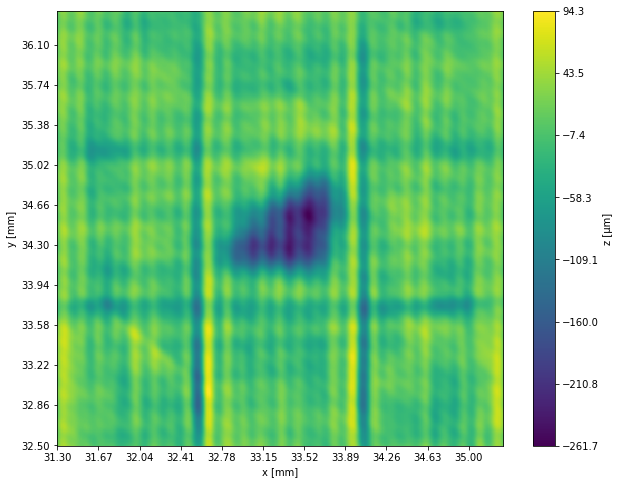

257 4.8 1.52631578947


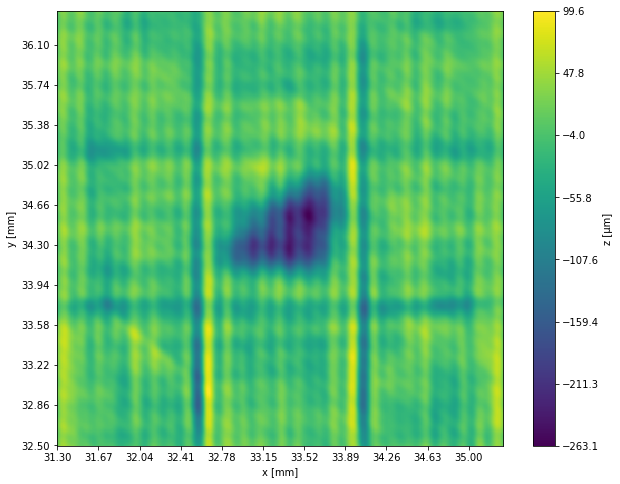

257 4.8 1.60526315789


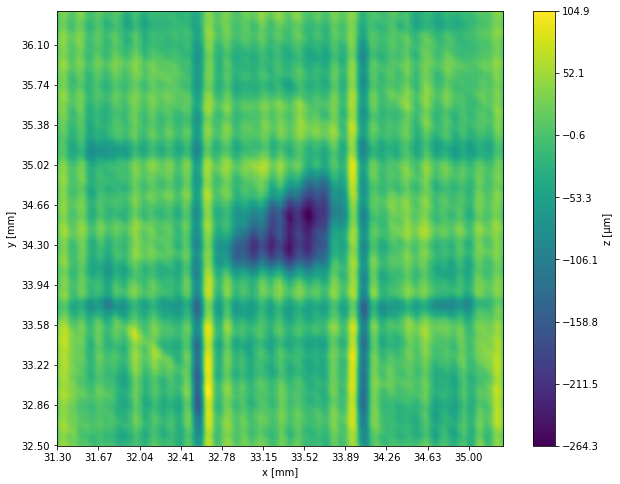

257 4.8 1.68421052632


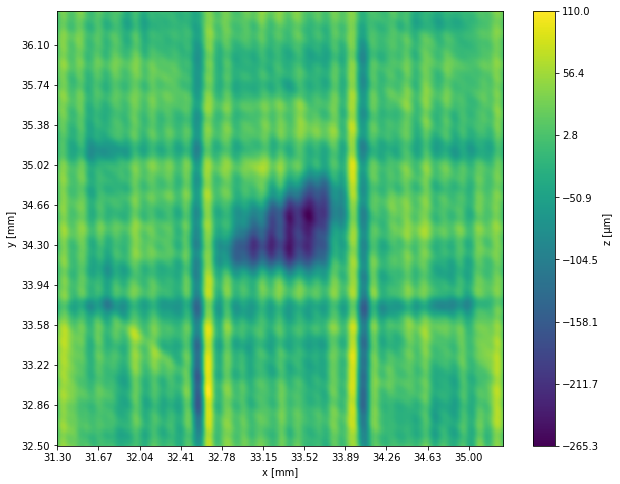

257 4.8 1.76315789474


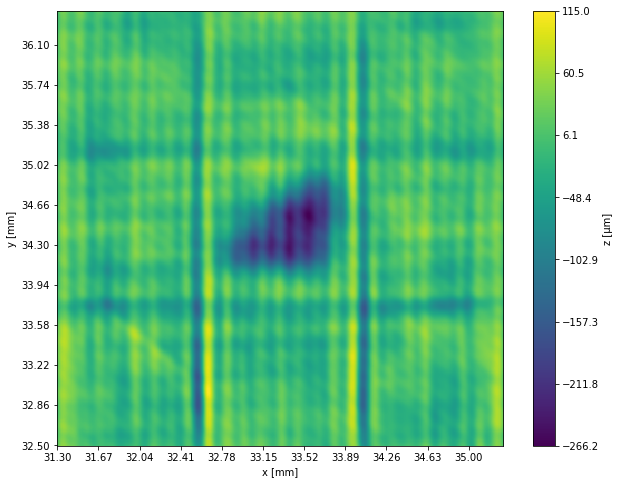

257 4.8 1.84210526316


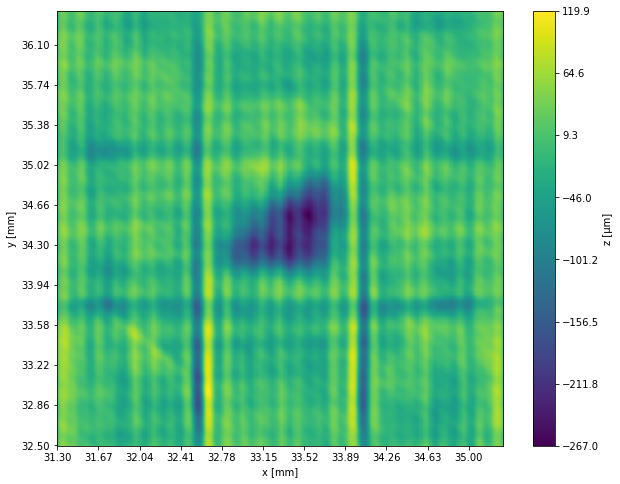

257 4.8 1.92105263158


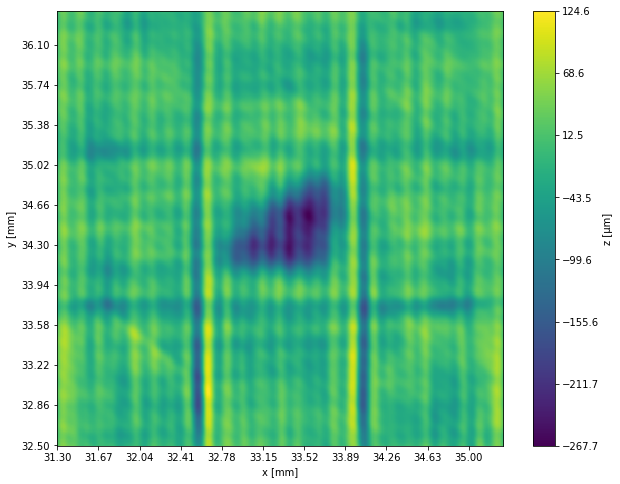

257 4.8 2.0


In [10]:
#from kapascan.sensor import SENSORS
#sensor = SENSORS[settings['sensors'][0]]
#diameter = 265
#blur = 5
for factor in np.linspace(0.5, 2, 20):
    ideal_factor = ideal * factor
    ideal_factor -= ideal_factor.mean()
#for factor in [0.11]:
    for diameter in [257]:
    #for diameter in range(245, 275, 2):
        for blur in [4.8]:
        #for blur in np.arange(2, 5, 0.25):
            kernel = np.pad(sensor_function(diameter), int(4*blur), 'constant')
            kernel = gaussian(kernel, blur)
            ideal_adapt = ideal * factor
            reconstructed_signal = wiener(signal, kernel, noise, ideal_factor)
            plt.figure()
            plot(x, y, reconstructed_signal)
            plt.show()
            #plt.savefig("figures/triangle_detrend/{}_{}_{}.png".format(diameter, blur, noise_factor))
            plt.close()
            print(diameter, blur, factor)

In [6]:
plt.close()